# Метрики классификации

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [6]:
predictors = ['attack', 'defense', 'speed']
X = df[predictors].values
y = df['is_legendary'].values

In [7]:
X

array([[ 49,  49,  45],
       [ 62,  63,  60],
       [100, 123,  80],
       ...,
       [101,  53,  43],
       [107, 101,  79],
       [ 95, 115,  65]])

In [9]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y.mean()

0.08739076154806492

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2)

In [17]:
y_train.mean(), y_test.mean()

(0.0875, 0.08695652173913043)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10**6)
model.fit(X_train, y_train)
model.coef_

array([[0.01042524, 0.03310031, 0.04321416]])

In [24]:
p_hat = model.predict_proba(X_test)[:,-1]  
p_hat[:20] # P(y = 1)

array([0.05327709, 0.00044083, 0.01192128, 0.02467656, 0.02474452,
       0.00670399, 0.26480413, 0.09948311, 0.06350661, 0.02320925,
       0.32439968, 0.0178638 , 0.21052059, 0.00924038, 0.01431445,
       0.00344322, 0.05025672, 0.03705024, 0.02630234, 0.05501166])

In [25]:
y_hat = model.predict(X_test)
y_hat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10000)
rf.fit(X_train, y_train)

q_hat = rf.predict_proba(X_test)[:,-1]  
y_rf = rf.predict(X_test)

## 1. Доля правильных ответов, accuracy

In [29]:
np.mean(y_hat == y_test)

0.9254658385093167

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.9254658385093167

In [30]:
y_zero_hat = np.zeros_like(y_test)
y_zero_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [31]:
accuracy_score(y_test, y_zero_hat)

0.9130434782608695

## 2. Матрица ошибок, полнота и точность

In [58]:
tr = 0.1
p_hat = model.predict_proba(X_test)[:,-1]  
y_hat = 1*(p_hat > tr)
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0])

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat, y_test)

array([[107,   2],
       [ 40,  12]])

In [93]:
confusion_matrix(y_rf, y_test)

array([[141,   9],
       [  6,   5]])

In [60]:
from sklearn.metrics import recall_score, precision_score
print( recall_score(y_test, y_hat) )
print( precision_score(y_test, y_hat) )

0.8571428571428571
0.23076923076923078


In [94]:
print( recall_score(y_test, y_rf) )
print( precision_score(y_test, y_rf) )

0.35714285714285715
0.45454545454545453


## 3. Precision-Recall curve

> ЛОЛ! А что если перебирать порог и смотреть какими получаются метрики и рисовать их

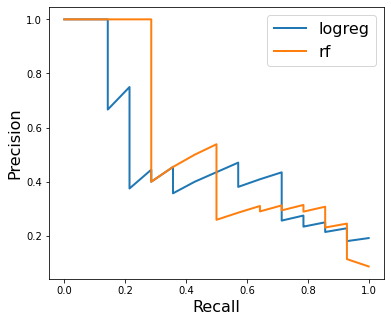

In [95]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(6,5))

pr, rc, tres = precision_recall_curve(y_test, p_hat)
plt.plot(rc, pr, lw=2, label='logreg')

pr, rc, tres = precision_recall_curve(y_test, q_hat)
plt.plot(rc, pr, lw=2, label='rf')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16);

Как принять решение? 

- Можно сказать, что мы хотим максимальную точность при ограничениях на полноту

$$
\max_{tr} (precision \mid recall > 0.4)
$$

In [78]:
ind = np.where(pr == pr[rc >= 0.4].max())
pr[ind][0], rc[ind][0], tres[ind][0]

(0.47058823529411764, 0.5714285714285714, 0.2915037652564444)

> ЛМАО! Эту стратегию можно расширить. Можно пытаться накладывать ограничения на precision лиюо другие бизнес-штуки

- Либо мы можем задать свои предпочтения на множестве метрик => f-мера, если предпочтения выпуклые 

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat)

0.36363636363636365

> ОМГ, все метрики, которые мы посмотрели, зависят от значения порога, а хочется, чтобы не зависили и мы не зацикливались на выборе порога, ну то есть мы хотим сначала обучить модель и понять какая из них самая классная, а уже вторым шагом хотим выбирать порог для принятия решения.

=> pr-auc (площадь под pr-кривой)

In [82]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_hat)

0.210224558050645

In [96]:
average_precision_score(y_test, y_rf)

0.21823828345567475

## 4. Roc-auc curve

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, p_hat)

0.8867832847424684

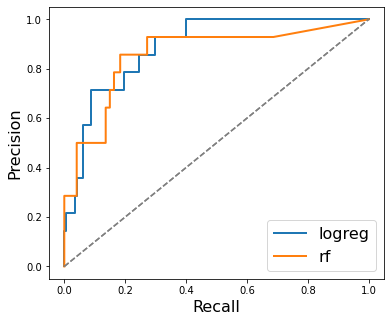

In [108]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(6,5))

fpr, tpr, tres = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, lw=2, label='logreg')

fpr, tpr, tres = roc_curve(y_test, q_hat)
plt.plot(fpr, tpr, lw=2, label='rf')

plt.plot([[0,0], [1,1]], linestyle='dashed', color='grey')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16);